## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [100]:
import math 
import matplotlib.pyplot as plt
import numpy as np
import cmath
import numpy.polynomial.polynomial as poly
from math import sqrt

def f(z):
    return z ** 2 -1

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5
    m = 1 # Newton's method for roots of multiplicity >1 https://math.stackexchange.com/questions/93156/newtons-method-for-roots-of-multiplicity-1/93158

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


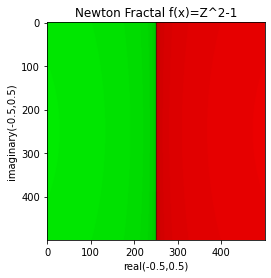

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


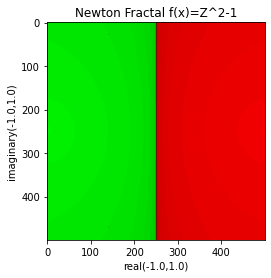

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


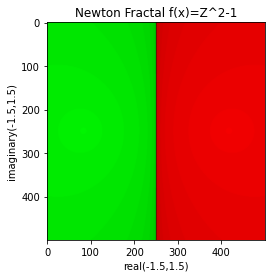

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


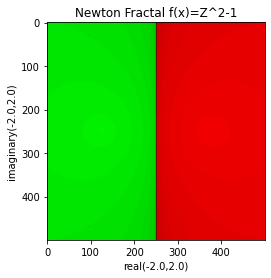

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


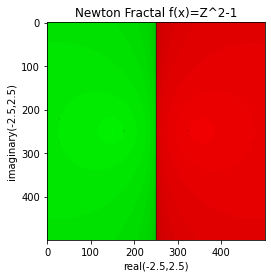

In [101]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

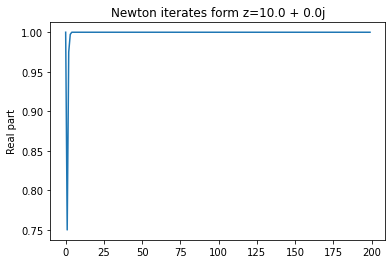

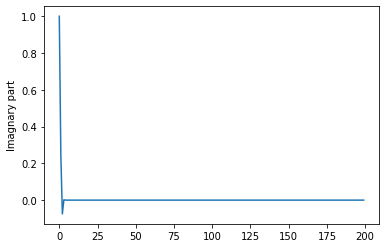

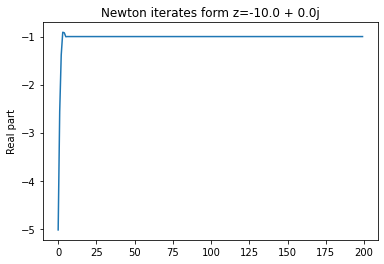

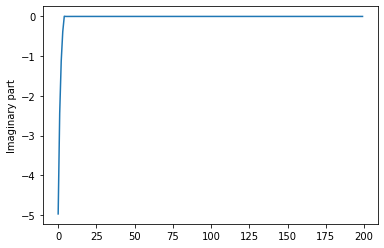

In [102]:
def f(z):
    return z**2-1 

def df(z):
    return 2*z
z=1.0 + 1.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = df(z)
  znext = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
z=-10.0 -  10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

In [103]:
def f(z):
    return z ** 2 

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 0
    r2 = 0

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5
    m = 1 # Newton's method for roots of multiplicity >1 https://math.stackexchange.com/questions/93156/newtons-method-for-roots-of-multiplicity-1/93158

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


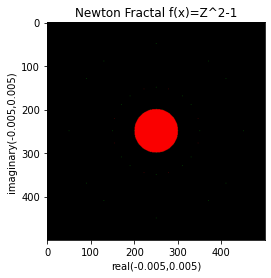

In [104]:
display1(zoom=0.01)

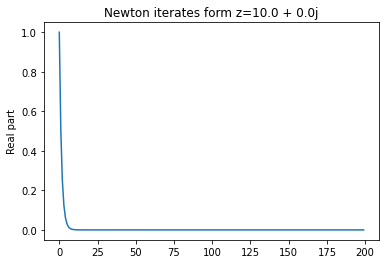

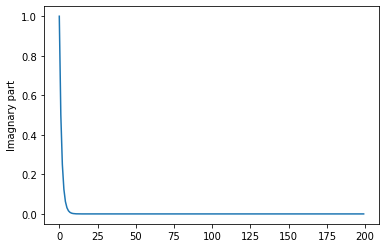

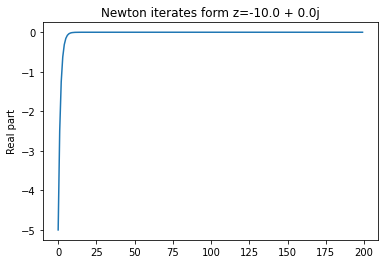

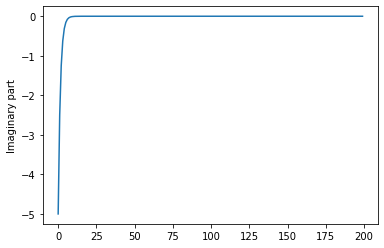

In [105]:
def f(z):
    return z ** 2 

def df(z):
    return 2 * z
z=1.0 + 1.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = df(z)
  znext = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
z=-10.0 -  10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

In [106]:
def f(z):
    return (z-1) ** 2 

def df(z):
    return 2 * (z-1)

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = 1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5
    m = 1 # Newton's method for roots of multiplicity >1 https://math.stackexchange.com/questions/93156/newtons-method-for-roots-of-multiplicity-1/93158

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=(Z-1)^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


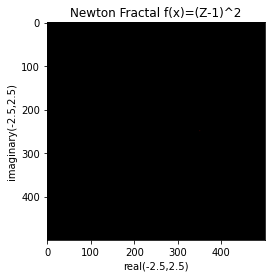

In [107]:
display1(zoom=5)

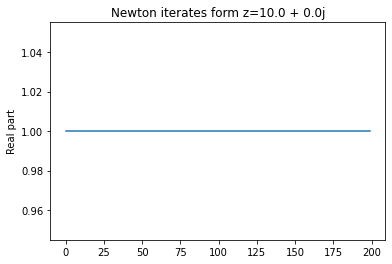

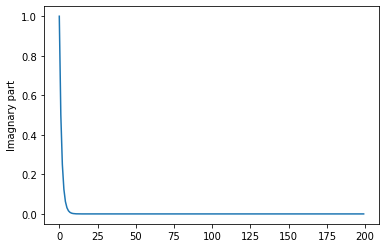

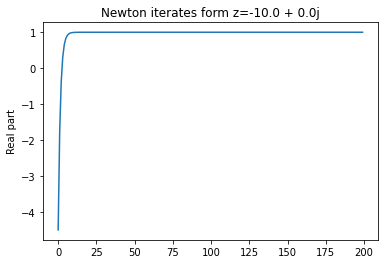

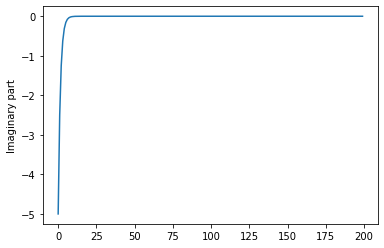

In [108]:
def f(z):
    return (z-1) ** 2 

def df(z):
    return 2 * (z-1)
z=1.0 + 1.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = df(z)
  znext = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()
z=-10.0 -  10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

Text(0, 0.5, 'f(x)')

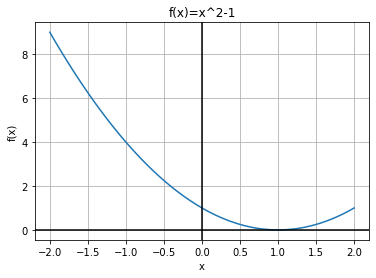

In [109]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2-1')
plt.xlabel('x')
plt.ylabel('f(x)')




In [110]:
def cuadratic(a, b, c):
  if b**2-4*a*c <0: 
    return "no hay raiz"
  d= (-b+sqrt(b**2-4*a*c))/2*a
  e= (-b-sqrt(b**2-4*a*c))/2*a
  return d, e
def po_shen(b, c):
  if (-b/2)**2-c<0:
    return "no hay raiz"
  d=(-b/2)+sqrt((-b/2)**2-c)
  e=(-b/2)-sqrt((-b/2)**2-c)
  return d,e
def plot (root, f, name):
  if type(root) is str:
    return print ("no tiene raices")
  x=np.linspace(-1+root[1],1+root[0],1000)
  fig,ax=plt.subplots()
  ax.plot(x,f(x))
  ax.axhline(y=0,color="k")
  ax.axvline(x=0,color="k")
  plt.title(name)
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.show()

In [111]:
def una (x):
  return x**2
def dos (x):
  return (x-1)**2
def tres (x):
  return x**2-1
def cuatro (x):
  return x**2+1

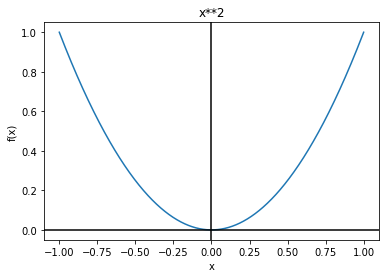

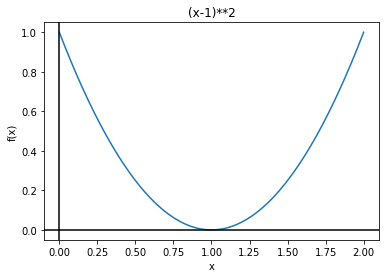

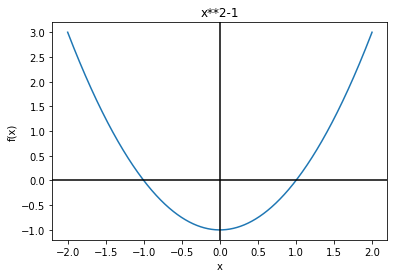

no tiene raices


In [112]:
plot(cuadratic(1,0,0),una,"x**2")
plot(cuadratic(1,-2,1),dos,"(x-1)**2")
plot(cuadratic(1,0,-1),tres,"x**2-1")
plot(cuadratic(1,0,1),cuatro,"x**2+1")

## Newton iterates form z=10.0 + 0.0j

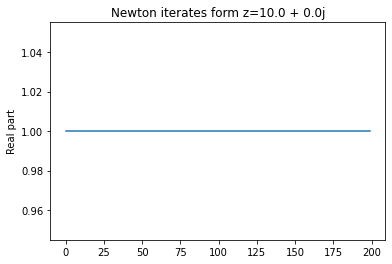

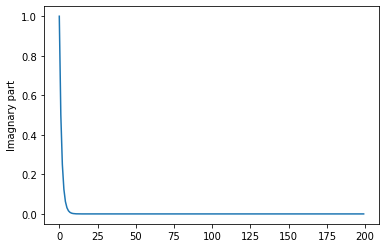

In [113]:
z=1.0 + 1.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = df(z)
  znext = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=-10.0 + 0.0j

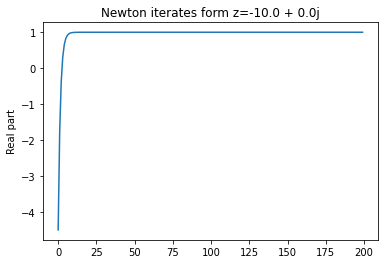

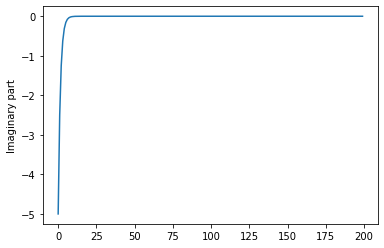

In [114]:
z=-10.0 -  10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 + 10.0j

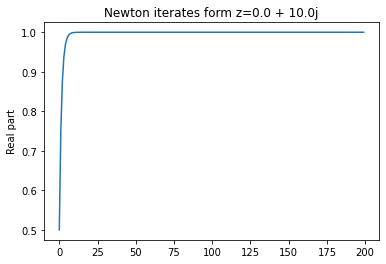

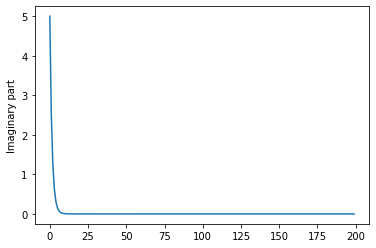

In [115]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 - 10.0j

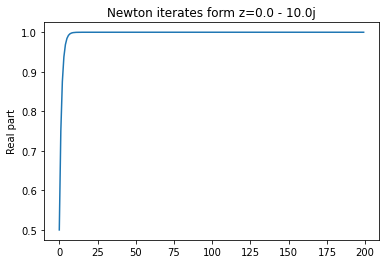

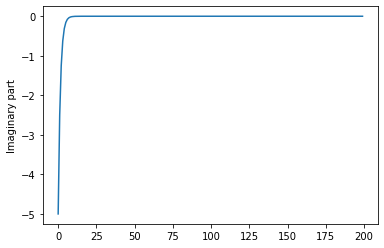

In [116]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 + 0.0j

In [117]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored